Description

In [ ]:
# Figure 1, 27 bp, 79 bp, 203 bp, etc. with -/+ ZF43 or ZF37, and -/+ 0.1x Cre 
# ZF = 0.125*112.5ng/well (0.125x)
# Can also be used to draw the same conclusions as Fig 1C and S1D 
# --> unimodal low/high setpoints and spacer+Cre and control+Cre converge for all spacer lengths

# Import Functions and set directories

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
#datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/fig2/fig2_'

# Import Data

In [2]:
#20240219flow_exp20240216_p2_YL2bad
#20240219flow_exp20240216_p3_YL2bad
#20240219flow_exp20240216_p1_YL2bad

In [3]:
# Import Data - bioreplicate 1
folder = '20240219flow_exp20240216_p2_YL2bad'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata_fig2_0.125xZF.yaml' #Assign yaml paths 
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder 

In [4]:
# Import Data - bioreplicate 2
folder = '20240219flow_exp20240216_p3_YL2bad'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata_fig2_0.125xZF.yaml' #Assign yaml paths 
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = folder 

In [5]:
# Import Data - bioreplicate 3
folder = '20240219flow_exp20240216_p1_YL2bad'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata_fig2_0.125xZF.yaml' #Assign yaml paths 
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = folder 

In [6]:
data1.rename(columns={'mRuby2-A': 'mCherry-A'}, inplace=True)
data2.rename(columns={'mRuby2-A': 'mCherry-A'}, inplace=True)
data3.rename(columns={'mRuby2-A': 'mCherry-A'}, inplace=True)

Concatenate Data and Gate on iRFP670

In [7]:
data = pd.concat( [data1, data2, data3], ignore_index=True)

In [8]:
data.columns.unique()

Index(['Rept', 'ZF', 'Cre', 'well', 'population', 'FSC-A', 'FSC-H', 'FSC-W',
       'SSC-A', 'SSC-H', 'SSC-W', 'mGL-A', 'mGL-H', 'mGL-W', 'iRFP670-A',
       'iRFP670-H', 'iRFP670-W', 'TagBFP-A', 'TagBFP-H', 'TagBFP-W',
       'Janelia Fluor 549-A', 'Janelia Fluor 549-H', 'Janelia Fluor 549-W',
       'mCherry-A', 'mRuby2-H', 'mRuby2-W', 'Time', 'bioreplicate'],
      dtype='object')

In [9]:
data['bioreplicate'].unique()

array(['20240219flow_exp20240216_p2_YL2bad',
       '20240219flow_exp20240216_p3_YL2bad',
       '20240219flow_exp20240216_p1_YL2bad'], dtype=object)

In [10]:
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
#data = data[ data['Janelia Fluor 549-A'] >0]
data = data[ data['iRFP670-A'] >0]
data['log10 mGL-A'] = np.log10(data['mGL-A'])

In [11]:
iRFP670_gate = 10000 
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]

## New Criteria (Rept, ZF, Cre)

In [12]:
#Combine ZF and Cre Conditions 
data_iRFP670gated['Rept.ZF.Cre'] = data_iRFP670gated['Rept'] + '.' +data_iRFP670gated['ZF'] + '.' + data_iRFP670gated['Cre']
data['Rept.ZF.Cre'] = data['Rept'] + '.' +data['ZF'] + '.' + data['Cre']

<ipython-input-12-2a9d96619102>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['Rept.ZF.Cre'] = data_iRFP670gated['Rept'] + '.' +data_iRFP670gated['ZF'] + '.' + data_iRFP670gated['Cre']


New Criteria (ZF and Cre), cond_list

In [13]:
#Combine ZF and Cre Conditions 
data_iRFP670gated['cond'] = data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']
data['cond'] = data['ZF'] + '. ' + data['Cre']

<ipython-input-13-2d076e67cfc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['cond'] = data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']


In [14]:
# Make a list of all the cond. This will be used for the order later on 
cond_list = pd.unique( data_iRFP670gated['cond'])
display(cond_list)

cond_list_nounstained = pd.array([
    #'noZF. noCre', 'noZF. Cre',
    'ZF43. noCre', 'ZF43. Cre',
       'ZF37. noCre','ZF37. Cre' ] )

cond_list_ZF43 = pd.array([ 'ZF43. noCre', 'ZF43. Cre'] )
cond_list_ZF37 = pd.array([ 'ZF37. noCre', 'ZF37. Cre'] )

array(['ZF37. Cre', 'ZF43. noCre', 'ZF43. Cre', 'ZF37. noCre',
       'none. none'], dtype=object)

New Criteria Bioreplicate + reporter

In [15]:
#Combine bioreplicate, ZF and Cre Conditions 
data_iRFP670gated['bioreplicate_cond_rept'] = data_iRFP670gated['bioreplicate'] + '. ' + data_iRFP670gated['Rept'] + '. ' + data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']
data['bioreplicate_cond_rept'] = data['bioreplicate'] + '. ' + data['Rept'] + '. ' + data['ZF'] + '. ' + data['Cre']

<ipython-input-15-3b8fbd920392>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iRFP670gated['bioreplicate_cond_rept'] = data_iRFP670gated['bioreplicate'] + '. ' + data_iRFP670gated['Rept'] + '. ' + data_iRFP670gated['ZF'] + '. ' + data_iRFP670gated['Cre']


---------------

In [16]:
conditions = pd.unique(data_iRFP670gated.bioreplicate_cond_rept)
display(conditions)

array(['20240219flow_exp20240216_p2_YL2bad. loxPcontrol. ZF37. Cre',
       '20240219flow_exp20240216_p2_YL2bad. loxPcontrol. ZF43. noCre',
       '20240219flow_exp20240216_p2_YL2bad. loxPcontrol. ZF43. Cre',
       '20240219flow_exp20240216_p2_YL2bad. loxPcontrol. ZF37. noCre',
       '20240219flow_exp20240216_p2_YL2bad. 27bp. ZF37. Cre',
       '20240219flow_exp20240216_p2_YL2bad. 27bp. ZF43. noCre',
       '20240219flow_exp20240216_p2_YL2bad. 27bp. ZF43. Cre',
       '20240219flow_exp20240216_p2_YL2bad. 27bp. ZF37. noCre',
       '20240219flow_exp20240216_p2_YL2bad. 79bp. ZF37. Cre',
       '20240219flow_exp20240216_p2_YL2bad. 79bp. ZF43. noCre',
       '20240219flow_exp20240216_p2_YL2bad. 79bp. ZF43. Cre',
       '20240219flow_exp20240216_p2_YL2bad. 79bp. ZF37. noCre',
       '20240219flow_exp20240216_p2_YL2bad. 155bp. ZF37. Cre',
       '20240219flow_exp20240216_p2_YL2bad. 155bp. ZF43. noCre',
       '20240219flow_exp20240216_p2_YL2bad. 155bp. ZF43. Cre',
       '20240219flow_exp2

supp gating figures

10000


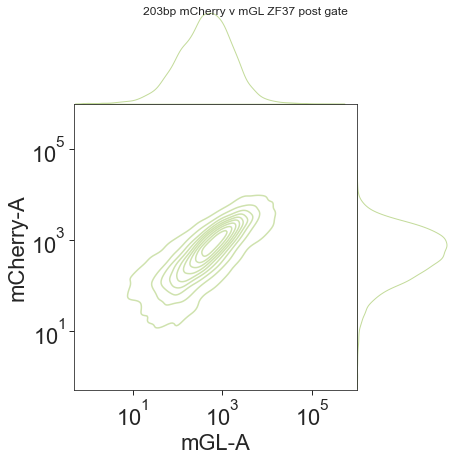

In [17]:
# figure S1-2 figures

#set the hue, hue_order, palette 
hue = 'Rept.ZF.Cre'; palette = 'bright'

order_repts = {
     #'203bp.noZF.noCre': 'grey', 
    # '203bp.noZF.Cre': 'black', 
    '203bp.ZF37.noCre': '#C3DB9A',                                                
#      '203bp.ZF37.Cre': '#69B645',
    # 'loxP control.ZF37.noCre': '#C3DB9A',
    # 'loxP control.ZF37.Cre': '#69B645',
    # '203bp.ZF43.noCre': '#C3DB9A', 
    # '203bp.ZF43.Cre': '#69B645',
    # 'loxP control.ZF43.noCre': '#C3DB9A',
    # 'loxP control.ZF43.Cre': '#69B645',
    #'none.none.none': 'black'
                         }

hue_order = order_repts; palette=order_repts

data_now = data_iRFP670gated[data_iRFP670gated['Rept.ZF.Cre']=='203bp.ZF37.noCre']

plottitle = '203bp mCherry v mGL ZF37 post gate'
g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                        plottitle=plottitle, legend=False,
                        palette=palette, alpha=0, type = ['contour'])
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


# order_repts = {
#      '203bp.noZF.noCre': 'grey', 
#     '203bp.noZF.Cre': 'black', 
#     #'203bp.ZF37.noCre': '#C3DB9A',                                                
#     # '203bp.ZF37.Cre': '#69B645',
#     # 'loxP control.ZF37.noCre': '#C3DB9A',
#     # 'loxP control.ZF37.Cre': '#69B645',
#     #'203bp.ZF43.noCre': '#C3DB9A', 
#     # '203bp.ZF43.Cre': '#69B645',
#     # 'loxP control.ZF43.noCre': '#C3DB9A',
#     # 'loxP control.ZF43.Cre': '#69B645',
#     #'none.none.none': 'black'
#                          }

# hue_order = order_repts; palette=order_repts

# plottitle = '203bp tagbfp v mGL noZF'
# g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
#                         plottitle=plottitle, legend=False,
#                         palette=palette, alpha=0, type = ['contour'])
# g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

# Joint Plot

In [ ]:
# tagBFP vs. mGL
plot_name = ' tagBFP v mGL'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept' #########biorep, cre
palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF43
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'], legend=False)
    #g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



In [ ]:
data_iRFP670gated.columns.unique()

In [ ]:
# mRuby2 vs. mGL
plot_name = ' mRuby2 v mGL'

#set the hue, hue_order, palette 
hue = 'bioreplicate_cond_rept'; palette = 'bright'; hue_order = None

cond_list_now = cond_list_ZF37
#cond_list_now = pd.array( ['ZF37. Cre']) #used for troubleshooting trying to get all replicates 

#Interate through the different conditions 
for cond in cond_list_now: 
    data_now = data_iRFP670gated[ data_iRFP670gated['cond']== cond]
    #data_now = data_now[data_now['bioreplicate'] == '20240120flow_exp20240117_p1'] #used for troubleshooting trying to get all replicates 
    #display(data_now)
    plottitle = cond + plot_name
    g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                            plottitle=plottitle, 
                            palette=palette, alpha=0, type = ['contour'],legend=False)
    #g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



# Summary plots

In [18]:
display(cond_list)

array(['ZF37. Cre', 'ZF43. noCre', 'ZF43. Cre', 'ZF37. noCre',
       'none. none'], dtype=object)

In [19]:
palette = {
           'noZF. noCre': 'grey',
           'noZF. Cre': 'black',
           'ZF43. noCre': 'deepskyblue',
           'ZF43. Cre': 'blue',
           'ZF37. noCre': 'darksalmon',
           'ZF37. Cre': 'red'
}

hue_order = pd.array([
                      'noZF. noCre',
                      'noZF. Cre',
                      'ZF43. noCre',
                      'ZF43. Cre',
                      'ZF37. noCre',
                      'ZF37. Cre'
])

## Summary Stats

In [20]:
df = data_iRFP670gated

# only 3 reps on same day
#df = data_iRFP670gated[data_iRFP670gated['bioreplicate'] != '20240309flow_exp20240306_p3'] #choose dataframe

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['Rept', 'ZF', 'Cre','cond','bioreplicate_cond_rept','bioreplicate'] #how to filter results, columns 


x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_bioreplicate = calc_stats(df,by,x,stat) #calculate statistics 
#display(s_bioreplicate) #display results, use for troublshooting

## Plot summary Plots

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=1.490e-04 stat=-1.405e+01
263bp_ZF43. noCre v.s. 263bp_ZF43. Cre: t-test independent samples, P_val=3.662e-04 stat=-1.117e+01
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=3.711e-04 stat=-1.113e+01
263bp_ZF37. noCre v.s. 263bp_ZF37. Cre: t-test independent samples, P_val=1.317e-04 stat=-1.449e+01
155bp_ZF43. noCre v.s. 155bp_ZF43. Cre: t-test independent samples, P_val=1.067e-03 stat=-8.466e+00
79bp_ZF37. noCre v.s. 79bp_ZF37. Cre: t-test independent samples, P_val=2.520e-02 stat=-3.486e+00
27bp_ZF37. noCre v.s. 27bp_ZF37. Cre: t-test independent samples, P_val=5.949e-02 stat=-2.609e+00
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=1.036e-03 stat=-8.532e+00
loxPcontrol_ZF37. noCre v.s. loxPcontrol

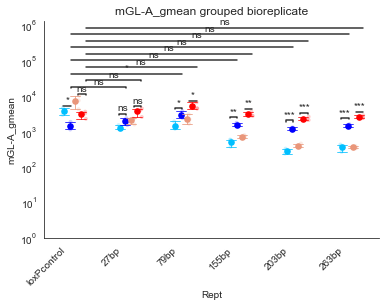

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=1.372e-01 stat=-1.855e+00
263bp_ZF43. noCre v.s. 263bp_ZF43. Cre: t-test independent samples, P_val=8.008e-01 stat=2.697e-01
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=7.136e-03 stat=5.069e+00
263bp_ZF37. noCre v.s. 263bp_ZF37. Cre: t-test independent samples, P_val=3.136e-02 stat=3.250e+00
155bp_ZF43. noCre v.s. 155bp_ZF43. Cre: t-test independent samples, P_val=8.238e-01 stat=-2.377e-01
79bp_ZF37. noCre v.s. 79bp_ZF37. Cre: t-test independent samples, P_val=3.788e-03 stat=6.040e+00
27bp_ZF37. noCre v.s. 27bp_ZF37. Cre: t-test independent samples, P_val=4.755e-02 stat=2.826e+00
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=8.917e-03 stat=4.758e+00
loxPcontrol_ZF37. noCre v.s. loxPcontrol_ZF37.

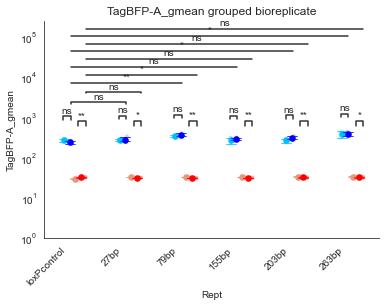

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=5.479e-01 stat=-6.555e-01
263bp_ZF43. noCre v.s. 263bp_ZF43. Cre: t-test independent samples, P_val=6.797e-01 stat=-4.445e-01
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=6.840e-01 stat=-4.380e-01
263bp_ZF37. noCre v.s. 263bp_ZF37. Cre: t-test independent samples, P_val=8.326e-01 stat=2.255e-01
155bp_ZF43. noCre v.s. 155bp_ZF43. Cre: t-test independent samples, P_val=3.425e-02 stat=-3.158e+00
79bp_ZF37. noCre v.s. 79bp_ZF37. Cre: t-test independent samples, P_val=2.438e-01 stat=-1.366e+00
27bp_ZF37. noCre v.s. 27bp_ZF37. Cre: t-test independent samples, P_val=9.458e-01 stat=-7.234e-02
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=2.776e-01 stat=-1.256e+00
loxPcontrol_ZF37. noCre v.s. loxPcontrol_

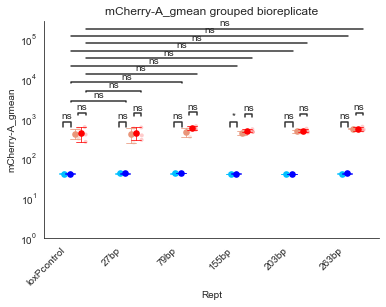

<Figure size 432x288 with 0 Axes>

In [21]:
#Plot summary plot for the desired statistics

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['loxPcontrol', '27bp', '79bp', '155bp', '203bp', '263bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'log'
ylim = [1, 1e4]

#Only plot some reporters
data_now = s_bioreplicate[s_bioreplicate['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

#Set p-value significance comparisons 
pairs = [


       [('203bp',  'ZF43. noCre'), ('203bp', 'ZF43. Cre')], # +ZF43, -/+ Cre
       [('79bp',  'ZF43. noCre'), ('79bp', 'ZF43. Cre')], # +ZF43, -/+ Cre
       [('27bp',  'ZF43. noCre'), ('27bp', 'ZF43. Cre')], # +ZF43, -/+ Cre
       [('155bp',  'ZF43. noCre'), ('155bp', 'ZF43. Cre')], # +ZF43, -/+ Cre
       [('263bp',  'ZF43. noCre'), ('263bp', 'ZF43. Cre')], # +ZF43, -/+ Cre
       [('loxPcontrol',  'ZF43. noCre'), ('loxPcontrol', 'ZF43. Cre')], #compare ZF43 to noZF, +Cre


       [('loxPcontrol', 'ZF43. Cre'), ('203bp', 'ZF43. Cre')], # +ZF43 + Cre with loxPcon
       [('loxPcontrol', 'ZF43. Cre'), ('79bp', 'ZF43. Cre')], # +ZF43 + Cre with loxPcon
       [('loxPcontrol', 'ZF43. Cre'), ('27bp', 'ZF43. Cre')], # +ZF43 + Cre with loxPcon
       [('loxPcontrol', 'ZF43. Cre'), ('155bp', 'ZF43. Cre')], # +ZF43 + Cre with loxPcon
       [('loxPcontrol', 'ZF43. Cre'), ('263bp', 'ZF43. Cre')],# +ZF43 + Cre with loxPcon



       [('203bp',  'ZF37. noCre'), ('203bp', 'ZF37. Cre')], # +ZF37, -/+ Cre
       [('79bp',  'ZF37. noCre'), ('79bp', 'ZF37. Cre')], # +ZF37, -/+ Cre
       [('27bp',  'ZF37. noCre'), ('27bp', 'ZF37. Cre')], # +ZF37, -/+ Cre
       [('155bp',  'ZF37. noCre'), ('155bp', 'ZF37. Cre')], # +ZF37, -/+ Cre
       [('263bp',  'ZF37. noCre'), ('263bp', 'ZF37. Cre')], # +ZF37, -/+ Cre
       [('loxPcontrol',  'ZF37. noCre'), ('loxPcontrol', 'ZF37. Cre')] ,# +ZF37, -/+ Cre

       [('loxPcontrol', 'ZF37. Cre'), ('203bp', 'ZF37. Cre')], # +ZF37 + Cre with loxPcon
       [('loxPcontrol', 'ZF37. Cre'), ('79bp', 'ZF37. Cre')], # +ZF37 + Cre with loxPcon
       [('loxPcontrol', 'ZF37. Cre'), ('27bp', 'ZF37. Cre')], # +ZF37 + Cre with loxPcon
       [('loxPcontrol', 'ZF37. Cre'), ('155bp', 'ZF37. Cre')], # +ZF37 + Cre with loxPcon
       [('loxPcontrol', 'ZF37. Cre'), ('263bp', 'ZF37. Cre')], # +ZF37 + Cre with loxPcon

      # [('203bp',  'ZF43. noCre'), ('203bp', 'ZF37. noCre')], #compare both ZF noCre
       #[('203bp',  'ZF43. Cre'), ('203bp', 'ZF37. Cre')], #compare both ZF Cre
]

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' grouped bioreplicate'
    plt.yscale(yscale)
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, ylim=ylim, yscale =yscale,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, legend=False)
    #g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

# Summary Stats

In [26]:
df = data_iRFP670gated #choose dataframe

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['Rept', 'ZF', 'Cre','cond','bioreplicate_cond_rept','bioreplicate'] #how to filter results, columns 


x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_bioreplicate = calc_stats(df,by,x,stat) #calculate statistics 
display(s_bioreplicate) #display results, use for troublshooting

s_bioreplicate[['Rept','ZF','Cre','cond','mGL-A_gmean','TagBFP-A_gmean','mCherry-A_gmean']].to_excel('FigS5C-S5D.xlsx',index=False)

#means 
df = s_bioreplicate #choose dataframe
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['Rept', 'ZF', 'Cre','cond'] #how to filter results, columns 
x = ['mGL-A_gmean'] #which parameter to calculate results on
stat = [ np.mean] #statistics to calculate
means = calc_stats(df,by,x,stat) #calculate statistics 
display(means) #display results, use for troublshooting

,Rept,ZF,Cre,cond,bioreplicate_cond_rept,bioreplicate,mGL-A_gmean,mGL-A_median,mGL-A_std,mGL-A_mean,TagBFP-A_gmean,TagBFP-A_median,TagBFP-A_std,TagBFP-A_mean,mCherry-A_gmean,mCherry-A_median,mCherry-A_std,mCherry-A_mean,Fraction,Count
0,155bp,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p1_YL2bad. 155bp. ZF3...,20240219flow_exp20240216_p1_YL2bad,2943.790553,3609.0,20568.984481,10056.733208,31.196049,39.0,37.861023,47.036295,475.106735,530.0,1286.769496,999.810597,1.0,4794
1,155bp,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF3...,20240219flow_exp20240216_p2_YL2bad,2853.933362,3513.0,20086.256925,9878.442747,32.366605,40.0,40.585726,48.671759,468.514431,505.0,1271.069515,988.322983,1.0,6087
2,155bp,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p3_YL2bad. 155bp. ZF3...,20240219flow_exp20240216_p3_YL2bad,3743.453014,4655.5,21830.007248,12020.011891,32.579292,40.0,37.391420,48.309743,553.906590,646.0,1398.158080,1136.306099,1.0,5214
3,155bp,ZF37,noCre,ZF37. noCre,20240219flow_exp20240216_p1_YL2bad. 155bp. ZF3...,20240219flow_exp20240216_p1_YL2bad,675.405012,799.5,5182.927715,1978.969431,33.932619,43.0,37.753580,50.216108,398.381704,430.5,1082.796517,821.073764,1.0,7524
4,155bp,ZF37,noCre,ZF37. noCre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF3...,20240219flow_exp20240216_p2_YL2bad,745.464802,893.0,7203.962065,2101.202097,34.269599,42.0,39.758145,50.777817,462.679617,519.5,1053.820048,898.140597,1.0,5626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,loxPcontrol,ZF43,Cre,ZF43. Cre,20240219flow_exp20240216_p3_YL2bad. loxPcontro...,20240219flow_exp20240216_p3_YL2bad,1381.519504,1651.0,7782.607912,3855.825570,268.370168,295.0,753.023871,564.745262,42.087727,52.0,39.485261,58.039190,1.0,3113
69,loxPcontrol,ZF43,noCre,ZF43. noCre,20240219flow_exp20240216_p1_YL2bad. loxPcontro...,20240219flow_exp20240216_p1_YL2bad,4800.982137,6167.0,28654.298374,15022.562104,278.215396,297.0,865.366066,612.208233,41.362898,51.0,38.787811,57.168497,1.0,11199
70,loxPcontrol,ZF43,noCre,ZF43. noCre,20240219flow_exp20240216_p2_YL2bad. loxPcontro...,20240219flow_exp20240216_p2_YL2bad,3051.001570,3816.0,21399.956263,9984.116833,256.410921,265.0,813.635689,568.407379,41.829006,52.0,38.627187,57.724058,1.0,6505
71,loxPcontrol,ZF43,noCre,ZF43. noCre,20240219flow_exp20240216_p3_YL2bad. loxPcontro...,20240219flow_exp20240216_p3_YL2bad,3776.669077,4681.0,20282.546423,11523.504981,296.634585,322.0,831.142207,630.070066,43.489162,53.0,42.597420,59.540773,1.0,5923


,Rept,ZF,Cre,cond,mGL-A_gmean_mean,Fraction,Count
0,155bp,ZF37,Cre,ZF37. Cre,3180.392309,1.0,3
1,155bp,ZF37,noCre,ZF37. noCre,744.604990,1.0,3
2,155bp,ZF43,Cre,ZF43. Cre,1622.731075,1.0,3
3,155bp,ZF43,noCre,ZF43. noCre,529.628631,1.0,3
4,203bp,ZF37,Cre,ZF37. Cre,2369.342077,1.0,3
5,203bp,ZF37,noCre,ZF37. noCre,409.806374,1.0,3
6,203bp,ZF43,Cre,ZF43. Cre,1240.150147,1.0,3
7,203bp,ZF43,noCre,ZF43. noCre,297.053014,1.0,3
8,263bp,ZF37,Cre,ZF37. Cre,2662.645006,1.0,3
9,263bp,ZF37,noCre,ZF37. noCre,368.102688,1.0,3


# For Figure, mGL means

In [33]:
# palette = {'ZF37. noCre': '#C3DB9A',
#            'ZF37. Cre': '#69B645', 
#            'ZF43. noCre': '#C3DB9A',
#            'ZF43. Cre': '#69B645'
# }

palette = {'ZF37. noCre': 'grey',
           'ZF37. Cre': 'black', 
           'ZF43. noCre': 'grey',
           'ZF43. Cre': 'black'
}

hue_order = pd.array([
                      #'noZF. noCre',
                      #'noZF. Cre',
                       'ZF43. noCre',
                       'ZF43. Cre',
                      'ZF37. noCre',
                      'ZF37. Cre'
])

## Fig S5C, ZF37 only

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

27bp_ZF37. noCre v.s. 27bp_ZF37. Cre: t-test independent samples, P_val=5.949e-02 stat=-2.609e+00
loxPcontrol_ZF37. noCre v.s. loxPcontrol_ZF37. Cre: t-test independent samples, P_val=7.555e-02 stat=2.385e+00
79bp_ZF37. noCre v.s. 79bp_ZF37. Cre: t-test independent samples, P_val=2.520e-02 stat=-3.486e+00
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=3.711e-04 stat=-1.113e+01
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=1.036e-03 stat=-8.532e+00
263bp_ZF37. noCre v.s. 263bp_ZF37. Cre: t-test independent samples, P_val=1.317e-04 stat=-1.449e+01


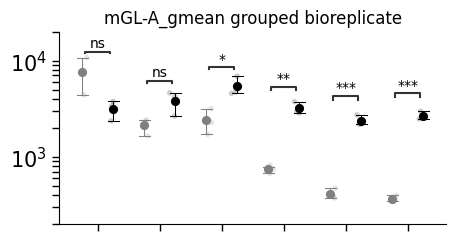

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

27bp_ZF37. noCre v.s. 27bp_ZF37. Cre: t-test independent samples, P_val=9.458e-01 stat=-7.234e-02
loxPcontrol_ZF37. noCre v.s. loxPcontrol_ZF37. Cre: t-test independent samples, P_val=8.814e-01 stat=-1.589e-01
79bp_ZF37. noCre v.s. 79bp_ZF37. Cre: t-test independent samples, P_val=2.438e-01 stat=-1.366e+00
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=6.840e-01 stat=-4.380e-01
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=2.776e-01 stat=-1.256e+00
263bp_ZF37. noCre v.s. 263bp_ZF37. Cre: t-test independent samples, P_val=8.326e-01 stat=2.255e-01


<Figure size 640x480 with 0 Axes>

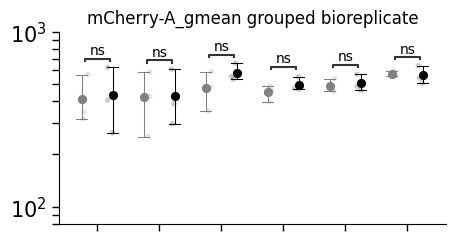

array(['20240219flow_exp20240216_p1_YL2bad',
       '20240219flow_exp20240216_p2_YL2bad',
       '20240219flow_exp20240216_p3_YL2bad'], dtype=object)

<Figure size 640x480 with 0 Axes>

In [39]:
#Plot summary plot for the desired statistics

sns.reset_defaults()

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['loxPcontrol', '27bp', '79bp', '155bp', '203bp', '263bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'log'
# ylim = [1e2, 2*1e4]

#Only plot some reporters
data_now = s_bioreplicate[s_bioreplicate['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

hue_order = pd.array(['ZF37. noCre',
             'ZF37. Cre'])

#Set p-value significance comparisons 
pairs = [


       [('203bp',  'ZF37. noCre'), ('203bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('79bp',  'ZF37. noCre'), ('79bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('27bp',  'ZF37. noCre'), ('27bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('155bp',  'ZF37. noCre'), ('155bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('263bp',  'ZF37. noCre'), ('263bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('loxPcontrol',  'ZF37. noCre'), ('loxPcontrol', 'ZF37. Cre')] #compare ZF43 to noZF, +Cre
]

fontsize = 15; xsize =5; ysize=2.5
ylims = { 'mGL-A_gmean': [2e2, 2e4], 
        'mCherry-A_gmean': [8e1, 1e3]}

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' grouped bioreplicate'
    ylim = ylims[stat]
    plt.figure(figsize=(xsize,ysize))
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                     pairs=pairs,
                     yscale =yscale, fontsize = fontsize,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, type='pointplot',
                    axis_lines = {'top': False, 'bottom': True, 'left': True, 'right': False}, legend=False, 
                    ylim = ylim, xticklabels=False, xlabel='', ylabel='')
    g.figure.savefig(figure_folder + plottitle + '0.125xZF37' + '.svg',dpi=300,bbox_inches='tight')

display(pd.unique(data_now['bioreplicate']))

## Fig S5D ZF43 only

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

27bp_ZF43. noCre v.s. 27bp_ZF43. Cre: t-test independent samples, P_val=7.146e-02 stat=-2.437e+00
loxPcontrol_ZF43. noCre v.s. loxPcontrol_ZF43. Cre: t-test independent samples, P_val=1.287e-02 stat=4.277e+00
79bp_ZF43. noCre v.s. 79bp_ZF43. Cre: t-test independent samples, P_val=2.867e-02 stat=-3.346e+00
203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=1.490e-04 stat=-1.405e+01
155bp_ZF43. noCre v.s. 155bp_ZF43. Cre: t-test independent samples, P_val=1.067e-03 stat=-8.466e+00
263bp_ZF43. noCre v.s. 263bp_ZF43. Cre: t-test independent samples, P_val=3.662e-04 stat=-1.117e+01


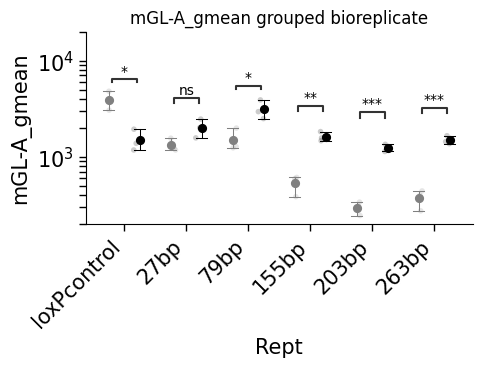

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

27bp_ZF43. noCre v.s. 27bp_ZF43. Cre: t-test independent samples, P_val=7.964e-01 stat=-2.757e-01
loxPcontrol_ZF43. noCre v.s. loxPcontrol_ZF43. Cre: t-test independent samples, P_val=1.324e-01 stat=1.886e+00
79bp_ZF43. noCre v.s. 79bp_ZF43. Cre: t-test independent samples, P_val=4.841e-01 stat=-7.703e-01
203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=1.372e-01 stat=-1.855e+00
155bp_ZF43. noCre v.s. 155bp_ZF43. Cre: t-test independent samples, P_val=8.238e-01 stat=-2.377e-01
263bp_ZF43. noCre v.s. 263bp_ZF43. Cre: t-test independent samples, P_val=8.008e-01 stat=2.697e-01


<Figure size 640x480 with 0 Axes>

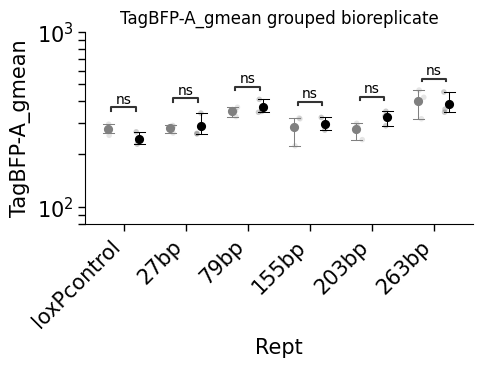

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot summary plot for the desired statistics

sns.reset_defaults()

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['loxPcontrol', '27bp', '79bp', '155bp', '203bp', '263bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'log'
# ylim = [1e2, 1e4]

hue_order = pd.array(['ZF43. noCre',
             'ZF43. Cre'
])

#Only plot some reporters
data_now = s_bioreplicate[s_bioreplicate['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

#Set p-value significance comparisons 
pairs = [


       [('203bp',  'ZF43. noCre'), ('203bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

       [('79bp',  'ZF43. noCre'), ('79bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

       [('27bp',  'ZF43. noCre'), ('27bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

       [('155bp',  'ZF43. noCre'), ('155bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

       [('263bp',  'ZF43. noCre'), ('263bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

       [('loxPcontrol',  'ZF43. noCre'), ('loxPcontrol', 'ZF43. Cre')] #compare ZF43 to noZF, +Cre

      # [('203bp',  'ZF43. noCre'), ('203bp', 'ZF37. noCre')], #compare both ZF noCre
       #[('203bp',  'ZF43. Cre'), ('203bp', 'ZF37. Cre')], #compare both ZF Cre
]

fontsize = 15; xsize =5; ysize=2.5
ylims = { 'mGL-A_gmean': [2e2, 2e4], 
        'TagBFP-A_gmean': [8e1, 1e3]}

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' grouped bioreplicate'
    ylim = ylims[stat]
    plt.figure(figsize=(xsize,ysize))
    fontsize = 15; xsize =5; ysize=2.5
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                     pairs=pairs, 
                     yscale =yscale, fontsize = fontsize, ylim=ylim,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, type='pointplot',
                    axis_lines = {'top': False, 'bottom': True, 'left': True, 'right': False}, legend=False)
    g.figure.savefig(figure_folder + plottitle + '0.125xZF43' + '.svg',dpi=300,bbox_inches='tight')

## ZF37 only

In [34]:
palette = {'ZF37. noCre': 'darksalmon',
           'ZF37. Cre': 'red'
}

hue_order = pd.array(['ZF37. noCre',
           'ZF37. Cre'
])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

27bp_ZF37. noCre v.s. 27bp_ZF37. Cre: t-test independent samples, P_val=5.949e-02 stat=-2.609e+00
loxPcontrol_ZF37. noCre v.s. loxPcontrol_ZF37. Cre: t-test independent samples, P_val=7.555e-02 stat=2.385e+00
79bp_ZF37. noCre v.s. 79bp_ZF37. Cre: t-test independent samples, P_val=2.520e-02 stat=-3.486e+00
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=3.711e-04 stat=-1.113e+01
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=1.036e-03 stat=-8.532e+00
263bp_ZF37. noCre v.s. 263bp_ZF37. Cre: t-test independent samples, P_val=1.317e-04 stat=-1.449e+01


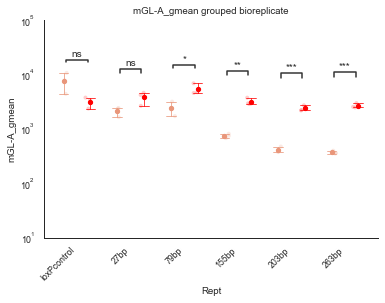

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

27bp_ZF37. noCre v.s. 27bp_ZF37. Cre: t-test independent samples, P_val=4.755e-02 stat=2.826e+00
loxPcontrol_ZF37. noCre v.s. loxPcontrol_ZF37. Cre: t-test independent samples, P_val=9.253e-03 stat=-4.708e+00
79bp_ZF37. noCre v.s. 79bp_ZF37. Cre: t-test independent samples, P_val=3.788e-03 stat=6.040e+00
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=7.136e-03 stat=5.069e+00
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=8.917e-03 stat=4.758e+00
263bp_ZF37. noCre v.s. 263bp_ZF37. Cre: t-test independent samples, P_val=3.136e-02 stat=3.250e+00


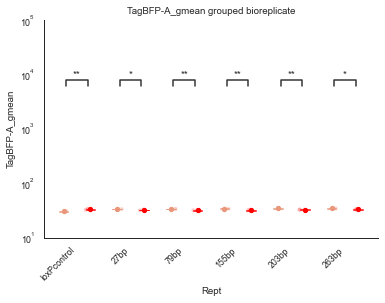

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

27bp_ZF37. noCre v.s. 27bp_ZF37. Cre: t-test independent samples, P_val=9.458e-01 stat=-7.234e-02
loxPcontrol_ZF37. noCre v.s. loxPcontrol_ZF37. Cre: t-test independent samples, P_val=8.814e-01 stat=-1.589e-01
79bp_ZF37. noCre v.s. 79bp_ZF37. Cre: t-test independent samples, P_val=2.438e-01 stat=-1.366e+00
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=6.840e-01 stat=-4.380e-01
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=2.776e-01 stat=-1.256e+00
263bp_ZF37. noCre v.s. 263bp_ZF37. Cre: t-test independent samples, P_val=8.326e-01 stat=2.255e-01


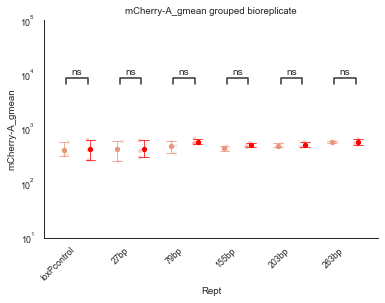

<Figure size 432x288 with 0 Axes>

In [35]:
#Plot summary plot for the desired statistics

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['loxPcontrol', '27bp', '79bp', '155bp', '203bp', '263bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'log'
ylim = [1e1, 1e5]

#Only plot some reporters
data_now = s_bioreplicate[s_bioreplicate['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

#Set p-value significance comparisons 
pairs = [


      #  [('203bp',  'ZF43. noCre'), ('203bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

      #  [('79bp',  'ZF43. noCre'), ('79bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

      #  [('27bp',  'ZF43. noCre'), ('27bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

      #  [('155bp',  'ZF43. noCre'), ('155bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

      #  [('263bp',  'ZF43. noCre'), ('263bp', 'ZF43. Cre')], # +ZF43, -/+ Cre

 #      [('loxPcontrol',  'ZF43. noCre'), ('loxPcontrol', 'ZF43. Cre')] #compare ZF43 to noZF, +Cre

       [('203bp',  'ZF37. noCre'), ('203bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('79bp',  'ZF37. noCre'), ('79bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('27bp',  'ZF37. noCre'), ('27bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('155bp',  'ZF37. noCre'), ('155bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('263bp',  'ZF37. noCre'), ('263bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       [('loxPcontrol',  'ZF37. noCre'), ('loxPcontrol', 'ZF37. Cre')] #compare ZF43 to noZF, +Cre

      # [('203bp',  'ZF43. noCre'), ('203bp', 'ZF37. noCre')], #compare both ZF noCre
       #[('203bp',  'ZF43. Cre'), ('203bp', 'ZF37. Cre')], #compare both ZF Cre
]

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' grouped bioreplicate'
    plt.yscale(yscale)
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, ylim=ylim, yscale =yscale,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
    #g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Normalized Plot to loxP 

In [36]:
# palette same as before 

hue_order = pd.array([
            'ZF37. noCre',
            'ZF37. Cre'
])

In [37]:
data_iRFP670gated

,Rept,ZF,Cre,well,population,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,...,Janelia Fluor 549-W,mCherry-A,mRuby2-H,mRuby2-W,Time,bioreplicate,log10 mGL-A,Rept.ZF.Cre,cond,bioreplicate_cond_rept
7,loxPcontrol,ZF37,Cre,A10,Single Cells,559973,273539,124,364945,218055,...,84,859,582,63,0.118417,20240219flow_exp20240216_p2_YL2bad,4.178632,loxPcontrol.ZF37.Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. loxPcontro...
31,loxPcontrol,ZF37,Cre,A10,Single Cells,535822,279944,115,445523,277689,...,61,226,130,28,0.511440,20240219flow_exp20240216_p2_YL2bad,3.413467,loxPcontrol.ZF37.Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. loxPcontro...
33,loxPcontrol,ZF37,Cre,A10,Single Cells,385641,265146,105,266727,196725,...,49,107,131,20,0.574732,20240219flow_exp20240216_p2_YL2bad,3.298416,loxPcontrol.ZF37.Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. loxPcontro...
43,loxPcontrol,ZF37,Cre,A10,Single Cells,337309,187798,115,307275,187943,...,58,237,142,22,0.656399,20240219flow_exp20240216_p2_YL2bad,2.041393,loxPcontrol.ZF37.Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. loxPcontro...
44,loxPcontrol,ZF37,Cre,A10,Single Cells,424935,206073,111,457788,299580,...,118,4777,2958,111,0.670691,20240219flow_exp20240216_p2_YL2bad,4.085754,loxPcontrol.ZF37.Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. loxPcontro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245414,263bp,ZF37,noCre,F9,Single Cells,283800,166833,110,232778,158364,...,65,751,513,55,44.941700,20240219flow_exp20240216_p1_YL2bad,2.730782,263bp.ZF37.noCre,ZF37. noCre,20240219flow_exp20240216_p1_YL2bad. 263bp. ZF3...
3245416,263bp,ZF37,noCre,F9,Single Cells,325121,218954,110,177680,133178,...,70,1365,992,60,44.943700,20240219flow_exp20240216_p1_YL2bad,2.841985,263bp.ZF37.noCre,ZF37. noCre,20240219flow_exp20240216_p1_YL2bad. 263bp. ZF3...
3245418,263bp,ZF37,noCre,F9,Single Cells,282755,191631,107,177469,123253,...,52,362,294,29,44.944700,20240219flow_exp20240216_p1_YL2bad,2.406540,263bp.ZF37.noCre,ZF37. noCre,20240219flow_exp20240216_p1_YL2bad. 263bp. ZF3...
3245423,263bp,ZF37,noCre,F9,Single Cells,453729,288364,107,331682,247998,...,84,1115,783,63,44.964800,20240219flow_exp20240216_p1_YL2bad,3.107888,263bp.ZF37.noCre,ZF37. noCre,20240219flow_exp20240216_p1_YL2bad. 263bp. ZF3...


In [38]:
data_iRFP670gated.bioreplicate.unique()

array(['20240219flow_exp20240216_p2_YL2bad',
       '20240219flow_exp20240216_p3_YL2bad',
       '20240219flow_exp20240216_p1_YL2bad'], dtype=object)

In [47]:
# Normalized summary plots with 3 bioreps to loxP -/+ Cre

bioreps_plot = pd.array(['20240219flow_exp20240216_p2_YL2bad','20240219flow_exp20240216_p3_YL2bad','20240219flow_exp20240216_p1_YL2bad', 
                         #'20240309flow_exp20240306', '20240314flow_exp20240311', '20240315flow_exp20240312'
                         ])

s_normalized = pd.DataFrame()

for biorep in bioreps_plot:
    df_biorep = data_iRFP670gated[data_iRFP670gated['bioreplicate'] == biorep] #choose dataframe
    by = ['Rept', 'ZF', 'Cre','cond','bioreplicate_cond_rept','Rept.ZF.Cre','bioreplicate'] #how to filter results, columns 
    x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 

    loxP_ZF37_noCre = s_biorep[s_biorep['Rept.ZF.Cre'] == 'loxPcontrol.ZF37.noCre']['mGL-A_gmean'].iloc[0]
    display(loxP_ZF37_noCre)

    loxP_ZF37_Cre = s_biorep[s_biorep['Rept.ZF.Cre'] == 'loxPcontrol.ZF37.Cre']['mGL-A_gmean'].iloc[0]
    display(loxP_ZF37_Cre)

    loxP_ZF43_noCre = s_biorep[s_biorep['Rept.ZF.Cre'] == 'loxPcontrol.ZF43.noCre']['mGL-A_gmean'].iloc[0]
    display(loxP_ZF43_noCre)

    loxP_ZF43_Cre = s_biorep[s_biorep['Rept.ZF.Cre'] == 'loxPcontrol.ZF43.Cre']['mGL-A_gmean'].iloc[0]
    display(loxP_ZF43_Cre)

    def normalize_mGL_gmean(row):
        if row['ZF'] == 'ZF37':
            if row['Cre'] == 'noCre':
                return row['mGL-A_gmean'] / loxP_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / loxP_ZF37_Cre
        else:
            if row['Cre'] == 'noCre':
                return row['mGL-A_gmean'] / loxP_ZF43_noCre
            else:
                return row['mGL-A_gmean'] / loxP_ZF43_Cre
            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized = pd.concat([s_normalized, s_biorep], ignore_index=True)

display(s_normalized)

4396.090493639658

2358.3772990137136

3051.001569802859

1178.0033279575173

7794.543490323419

3390.2564964066146

3776.6690766151764

1381.5195037953329

10706.289112434968

3759.5814261570004

4800.982137448553

1936.100649308566

,Rept,ZF,Cre,cond,bioreplicate_cond_rept,Rept.ZF.Cre,bioreplicate,mGL-A_gmean,TagBFP-A_gmean,mCherry-A_gmean,Fraction,Count,Normalized_mGL-A_gmean
0,155bp,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF3...,155bp.ZF37.Cre,20240219flow_exp20240216_p2_YL2bad,2853.933362,32.366605,468.514431,1.0,6087,1.210126
1,155bp,ZF37,noCre,ZF37. noCre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF3...,155bp.ZF37.noCre,20240219flow_exp20240216_p2_YL2bad,745.464802,34.269599,462.679617,1.0,5626,0.169574
2,155bp,ZF43,Cre,ZF43. Cre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF4...,155bp.ZF43.Cre,20240219flow_exp20240216_p2_YL2bad,1570.988836,289.907118,42.553647,1.0,8721,1.333603
3,155bp,ZF43,noCre,ZF43. noCre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF4...,155bp.ZF43.noCre,20240219flow_exp20240216_p2_YL2bad,592.833290,321.839081,41.838636,1.0,6107,0.194308
4,203bp,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. 203bp. ZF3...,203bp.ZF37.Cre,20240219flow_exp20240216_p2_YL2bad,2177.859128,32.862587,463.050723,1.0,6611,0.923457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,79bp,ZF43,noCre,ZF43. noCre,20240219flow_exp20240216_p1_YL2bad. 79bp. ZF43...,79bp.ZF43.noCre,20240219flow_exp20240216_p1_YL2bad,1989.733113,370.525420,42.338942,1.0,17669,0.414443
69,loxPcontrol,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p1_YL2bad. loxPcontro...,loxPcontrol.ZF37.Cre,20240219flow_exp20240216_p1_YL2bad,3759.581426,32.350867,265.210986,1.0,6857,1.000000
70,loxPcontrol,ZF37,noCre,ZF37. noCre,20240219flow_exp20240216_p1_YL2bad. loxPcontro...,loxPcontrol.ZF37.noCre,20240219flow_exp20240216_p1_YL2bad,10706.289112,31.105794,317.599140,1.0,6269,1.000000
71,loxPcontrol,ZF43,Cre,ZF43. Cre,20240219flow_exp20240216_p1_YL2bad. loxPcontro...,loxPcontrol.ZF43.Cre,20240219flow_exp20240216_p1_YL2bad,1936.100649,240.696166,41.711146,1.0,8789,1.000000


## Normalize to within spacer

In [30]:
# Normalized summary plots with 3 bioreps to within spacer, +ZF -Cre

bioreps_plot = pd.array(['20240219flow_exp20240216_p2_YL2bad','20240219flow_exp20240216_p3_YL2bad','20240219flow_exp20240216_p1_YL2bad',
                         #'20240309flow_exp20240306', '20240314flow_exp20240311', '20240315flow_exp20240312'
                         ])

s_normalized = pd.DataFrame()

for biorep in bioreps_plot:
    df_biorep = data_iRFP670gated[data_iRFP670gated['bioreplicate'] == biorep] #choose dataframe
    by = ['Rept', 'ZF', 'Cre','cond','bioreplicate_cond_rept','bioreplicate'] #how to filter results, columns 
    x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 

    loxP_ZF37_noCre = s_biorep[(s_biorep['Rept'] == 'loxPcontrol') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37')]['mGL-A_gmean'].iloc[0]
    display(loxP_ZF37_noCre)

    loxP_ZF43_noCre = s_biorep[(s_biorep['Rept'] == 'loxPcontrol') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43')]['mGL-A_gmean'].iloc[0]
    display(loxP_ZF43_noCre)

    s27bp_ZF37_noCre = s_biorep[(s_biorep['Rept'] == '27bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37')]['mGL-A_gmean'].iloc[0]
    display(s27bp_ZF37_noCre)

    s27bp_ZF43_noCre = s_biorep[(s_biorep['Rept'] == '27bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43')]['mGL-A_gmean'].iloc[0]
    display(s27bp_ZF43_noCre)

    if '79bp' in s_biorep['Rept'].values:
        s79bp_ZF37_noCre = s_biorep[(s_biorep['Rept'] == '79bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37')]['mGL-A_gmean'].iloc[0]
        display(s79bp_ZF37_noCre)

    if '79bp' in s_biorep['Rept'].values:
        s79bp_ZF43_noCre = s_biorep[(s_biorep['Rept'] == '79bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43')]['mGL-A_gmean'].iloc[0]
        display(s79bp_ZF43_noCre)

    s155bp_ZF37_noCre = s_biorep[(s_biorep['Rept'] == '155bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37')]['mGL-A_gmean'].iloc[0]
    display(s155bp_ZF37_noCre)

    s155bp_ZF43_noCre = s_biorep[(s_biorep['Rept'] == '155bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43')]['mGL-A_gmean'].iloc[0]
    display(s155bp_ZF43_noCre)

    s203bp_ZF37_noCre = s_biorep[(s_biorep['Rept'] == '203bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37')]['mGL-A_gmean'].iloc[0]
    display(s203bp_ZF37_noCre)

    s203bp_ZF43_noCre = s_biorep[(s_biorep['Rept'] == '203bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43')]['mGL-A_gmean'].iloc[0]
    display(s203bp_ZF43_noCre)

    s263bp_ZF37_noCre = s_biorep[(s_biorep['Rept'] == '263bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37')]['mGL-A_gmean'].iloc[0]
    display(s263bp_ZF37_noCre)

    s263bp_ZF43_noCre = s_biorep[(s_biorep['Rept'] == '263bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43')]['mGL-A_gmean'].iloc[0]
    display(s263bp_ZF43_noCre)

    def normalize_mGL_gmean(row):
        if row['Rept'] == 'loxPcontrol':
            if row['ZF'] == 'ZF37':
                return row['mGL-A_gmean'] / loxP_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / loxP_ZF43_noCre
        elif row['Rept'] == '27bp':
            if row['ZF'] == 'ZF37':
                return row['mGL-A_gmean'] / s27bp_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / s27bp_ZF43_noCre
        elif row['Rept'] == '79bp':
            if row['ZF'] == 'ZF37':
                return row['mGL-A_gmean'] / s79bp_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / s79bp_ZF43_noCre
        elif row['Rept'] == '155bp':
            if row['ZF'] == 'ZF37':
                return row['mGL-A_gmean'] / s155bp_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / s155bp_ZF43_noCre
        elif row['Rept'] == '203bp':
            if row['ZF'] == 'ZF37':
                return row['mGL-A_gmean'] / s203bp_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / s203bp_ZF43_noCre
        elif row['Rept'] == '263bp':
            if row['ZF'] == 'ZF37':
                return row['mGL-A_gmean'] / s263bp_ZF37_noCre
            else:
                return row['mGL-A_gmean'] / s263bp_ZF43_noCre
            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized = pd.concat([s_normalized, s_biorep], ignore_index=True)

display(s_normalized)
s_normalized[['Rept','cond','mGL-A_gmean','Normalized_mGL-A_gmean']].to_excel('Fig1E_S5B_normalized spacerlength.xlsx',index=False)

4396.090493639658

3051.001569802859

1640.152994184117

1177.8166578633725

1714.0171409126363

1276.528833830948

745.4648020926066

592.833290139712

373.27282828449484

307.20655416401496

358.3233108018767

442.38405740334287

7794.543490323419

3776.6690766151764

2352.509087637776

1223.3034599889363

2279.885471266608

1239.1415302833536

812.9451548437103

610.7486319071975

472.23871530210045

338.48691985578284

396.4835648391842

397.9207040117367

10706.289112434968

4800.982137448553

2416.404866086736

1561.2560139821535

3164.4766997094703

1989.7331127369491

675.4050120712393

385.3039714261969

383.9075793295602

245.46556880333952

349.50118938566806

274.51374242278723

,Rept,ZF,Cre,cond,bioreplicate_cond_rept,bioreplicate,mGL-A_gmean,TagBFP-A_gmean,mCherry-A_gmean,Fraction,Count,Normalized_mGL-A_gmean
0,155bp,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF3...,20240219flow_exp20240216_p2_YL2bad,2853.933362,32.366605,468.514431,1.0,6087,3.828395
1,155bp,ZF37,noCre,ZF37. noCre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF3...,20240219flow_exp20240216_p2_YL2bad,745.464802,34.269599,462.679617,1.0,5626,1.000000
2,155bp,ZF43,Cre,ZF43. Cre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF4...,20240219flow_exp20240216_p2_YL2bad,1570.988836,289.907118,42.553647,1.0,8721,2.649967
3,155bp,ZF43,noCre,ZF43. noCre,20240219flow_exp20240216_p2_YL2bad. 155bp. ZF4...,20240219flow_exp20240216_p2_YL2bad,592.833290,321.839081,41.838636,1.0,6107,1.000000
4,203bp,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p2_YL2bad. 203bp. ZF3...,20240219flow_exp20240216_p2_YL2bad,2177.859128,32.862587,463.050723,1.0,6611,5.834497
...,...,...,...,...,...,...,...,...,...,...,...,...
68,79bp,ZF43,noCre,ZF43. noCre,20240219flow_exp20240216_p1_YL2bad. 79bp. ZF43...,20240219flow_exp20240216_p1_YL2bad,1989.733113,370.525420,42.338942,1.0,17669,1.000000
69,loxPcontrol,ZF37,Cre,ZF37. Cre,20240219flow_exp20240216_p1_YL2bad. loxPcontro...,20240219flow_exp20240216_p1_YL2bad,3759.581426,32.350867,265.210986,1.0,6857,0.351156
70,loxPcontrol,ZF37,noCre,ZF37. noCre,20240219flow_exp20240216_p1_YL2bad. loxPcontro...,20240219flow_exp20240216_p1_YL2bad,10706.289112,31.105794,317.599140,1.0,6269,1.000000
71,loxPcontrol,ZF43,Cre,ZF43. Cre,20240219flow_exp20240216_p1_YL2bad. loxPcontro...,20240219flow_exp20240216_p1_YL2bad,1936.100649,240.696166,41.711146,1.0,8789,0.403272


## Plot Normalized To Within Spacer (Fold Change) _Fig1E, S5B

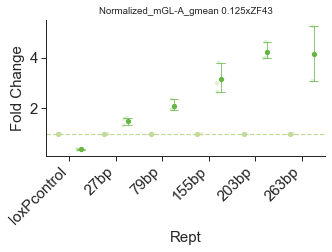

<Figure size 432x288 with 0 Axes>

In [50]:
#Plot Fold Change for ZF37 or ZF43 (comment out the relevant parts)

#Same palette as before 
palette = {'ZF37. noCre': '#C3DB9A',
           'ZF37. Cre': '#69B645', 
           'ZF43. noCre': '#C3DB9A',
           'ZF43. Cre': '#69B645'
}

#Hue-order is only ZF37
# hue_order =  ['ZF37. noCre',
#            'ZF37. Cre']

hue_order =  ['ZF43. noCre',
           'ZF43. Cre']

#List of stats to plot 
stats_plot = pd.array( ['Normalized_mGL-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['loxPcontrol', '27bp', '79bp', '155bp', '203bp', '263bp'])
order = order_repts; x = 'Rept'; hue='cond'; yscale= 'linear'
ylim = []
#Only plot some reporters
data_now = s_normalized[s_normalized['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

ylabel = 'Fold Change'

fontsize = 15; xsize =5; ysize=2.5

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' 0.125xZF43'
    plt.figure(figsize=(xsize,ysize))
    plt.axhline(y=1, ls='--', color=palette['ZF37. noCre'])
    g = summary_plot( x=x, y=y, hue=hue, data=data_now,
                     yscale =yscale, fontsize = fontsize,
                    x_rot=45, palette = palette, order=order, ylabel=ylabel,
                    hue_order=hue_order, plottitle=plottitle, type='pointplot',
                    axis_lines = {'top': False, 'bottom': True, 'left': True, 'right': False}, 
                    legend=False)
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## 203bp, 155bp 5 setpoints

In [42]:
palette = {'ZF43. noCre': 'deepskyblue',
           'ZF43. Cre': 'blue',
           'ZF37. noCre': 'darksalmon',
           'ZF37. Cre': 'red'
}

hue_order = pd.array(['ZF43. noCre',
             
             'ZF37. noCre',
             'ZF43. Cre',
           'ZF37. Cre'
])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ZF43. Cre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=3.561e-03 stat=-6.143e+00
203bp_ZF43. noCre v.s. 203bp_ZF37. noCre: t-test independent samples, P_val=5.352e-02 stat=-2.710e+00
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=3.711e-04 stat=-1.113e+01
203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=1.490e-04 stat=-1.405e+01


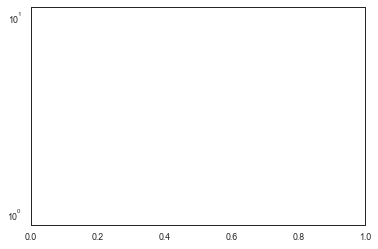

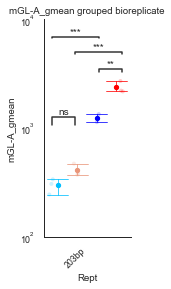

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ZF43. Cre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=8.320e-05 stat=1.629e+01
203bp_ZF43. noCre v.s. 203bp_ZF37. noCre: t-test independent samples, P_val=1.680e-04 stat=1.363e+01
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=7.136e-03 stat=5.069e+00
203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=1.372e-01 stat=-1.855e+00


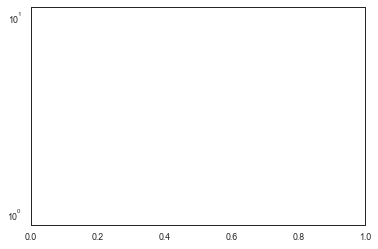

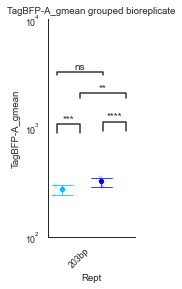

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ZF43. Cre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=1.354e-04 stat=-1.439e+01
203bp_ZF43. noCre v.s. 203bp_ZF37. noCre: t-test independent samples, P_val=5.599e-05 stat=-1.800e+01
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=6.840e-01 stat=-4.380e-01
203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=5.479e-01 stat=-6.555e-01


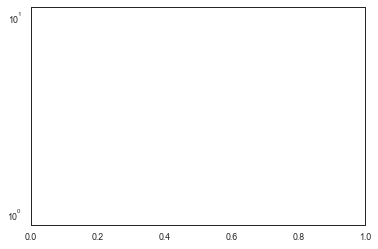

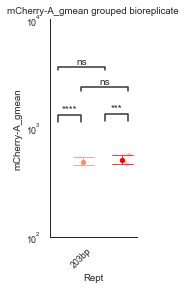

<Figure size 432x288 with 0 Axes>

In [43]:
#Plot summary plot for the desired statistics

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['203bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'log'
ylim = [1e2, 1e4]

#Only plot some reporters
data_now = s_bioreplicate[s_bioreplicate['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

#Set p-value significance comparisons 
pairs = [
       [('203bp',  'ZF43. noCre'), ('203bp', 'ZF43. Cre')],
       [('203bp',  'ZF43. noCre'), ('203bp', 'ZF37. noCre')],
       [('203bp',  'ZF43. Cre'), ('203bp', 'ZF37. Cre')],
       [('203bp',  'ZF37. noCre'), ('203bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       ]

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' grouped bioreplicate'
    plt.yscale(yscale)
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, ylim=ylim, yscale =yscale,
                    x_rot=45, aspect = 2.5, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
    g.figure.savefig(figure_folder + plottitle + '0.125xZF_203bp' + '.svg',dpi=300,bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

203bp_ZF43. Cre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=1.681e-03 stat=-7.511e+00
203bp_ZF37. noCre v.s. 203bp_ZF37. Cre: t-test independent samples, P_val=4.926e-09 stat=-1.868e+02
203bp_ZF43. noCre v.s. 203bp_ZF43. Cre: t-test independent samples, P_val=1.023e-04 stat=-1.545e+01


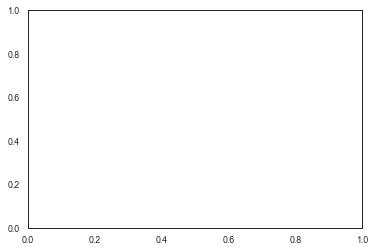

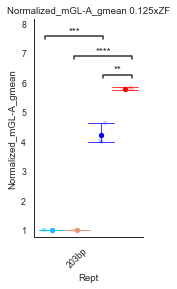

<Figure size 432x288 with 0 Axes>

In [44]:
#List of stats to plot 
stats_plot = pd.array( ['Normalized_mGL-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['203bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'linear'
#ylim = [-1,2]
#Only plot some reporters
data_now = s_normalized[s_normalized['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

pairs = [
       [('203bp',  'ZF43. noCre'), ('203bp', 'ZF43. Cre')],
       #[('203bp',  'ZF43. noCre'), ('203bp', 'ZF37. noCre')],
       [('203bp',  'ZF43. Cre'), ('203bp', 'ZF37. Cre')],
       [('203bp',  'ZF37. noCre'), ('203bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       ]


for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' 0.125xZF'
    plt.yscale(yscale)
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, yscale =yscale, pairs=pairs, aspect=2,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
    g.figure.savefig(figure_folder + plottitle + '203bp' + '.svg',dpi=300,bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

155bp_ZF43. Cre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=6.730e-03 stat=-5.153e+00
155bp_ZF43. noCre v.s. 155bp_ZF37. noCre: t-test independent samples, P_val=5.974e-02 stat=-2.605e+00
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=1.036e-03 stat=-8.532e+00
155bp_ZF43. noCre v.s. 155bp_ZF43. Cre: t-test independent samples, P_val=1.067e-03 stat=-8.466e+00


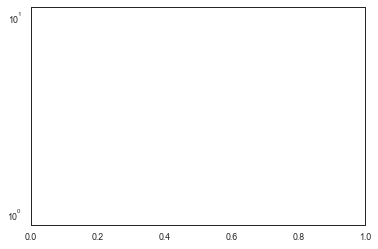

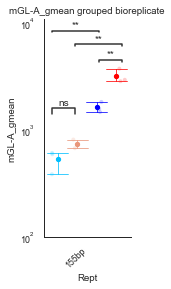

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

155bp_ZF43. Cre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=5.703e-05 stat=1.792e+01
155bp_ZF43. noCre v.s. 155bp_ZF37. noCre: t-test independent samples, P_val=1.418e-03 stat=7.856e+00
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=8.917e-03 stat=4.758e+00
155bp_ZF43. noCre v.s. 155bp_ZF43. Cre: t-test independent samples, P_val=8.238e-01 stat=-2.377e-01


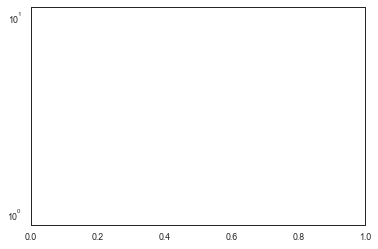

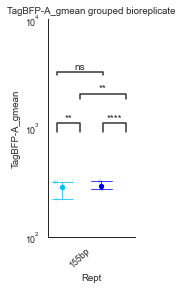

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

155bp_ZF43. Cre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=7.616e-05 stat=-1.665e+01
155bp_ZF43. noCre v.s. 155bp_ZF37. noCre: t-test independent samples, P_val=1.156e-04 stat=-1.498e+01
155bp_ZF37. noCre v.s. 155bp_ZF37. Cre: t-test independent samples, P_val=2.776e-01 stat=-1.256e+00
155bp_ZF43. noCre v.s. 155bp_ZF43. Cre: t-test independent samples, P_val=3.425e-02 stat=-3.158e+00


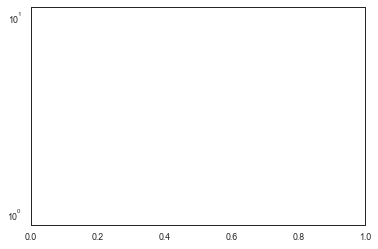

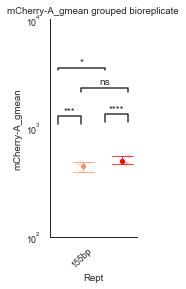

<Figure size 432x288 with 0 Axes>

In [45]:
#Plot summary plot for the desired statistics

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'])
#set plotting parameters 
order_repts = pd.array( ['155bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'log'
ylim = [1e2, 1e4]

#Only plot some reporters
data_now = s_bioreplicate[s_bioreplicate['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)

#Set p-value significance comparisons 
pairs = [
       [('155bp',  'ZF43. noCre'), ('155bp', 'ZF43. Cre')],
       [('155bp',  'ZF43. noCre'), ('155bp', 'ZF37. noCre')],
       [('155bp',  'ZF43. Cre'), ('155bp', 'ZF37. Cre')],
       [('155bp',  'ZF37. noCre'), ('155bp', 'ZF37. Cre')], # +ZF43, -/+ Cre

       ]

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' grouped bioreplicate'
    plt.yscale(yscale)
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, ylim=ylim, yscale =yscale,
                    x_rot=45, aspect = 2.5, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle,legend=False)
    g.figure.savefig(figure_folder + plottitle + '0.125xZF_155bp' + '.svg',dpi=300,bbox_inches='tight')

-----------

# 1D Histograms - by the spacer length

In [ ]:
palette = {
        'loxPcontrol.noZF.noCre': 'gray',
        '27bp.noZF.noCre': 'gray',
        '79bp.noZF.noCre': 'gray',
        '155bp.noZF.noCre': 'gray',
        '203bp.noZF.noCre': 'gray',
        '263bp.noZF.noCre': 'gray',
        
        'loxPcontrol.ZF43.noCre': '#C3DB9A',
        '27bp.ZF43.noCre': '#C3DB9A',
        '79bp.ZF43.noCre': '#C3DB9A',
        '155bp.ZF43.noCre': '#C3DB9A',
        '203bp.ZF43.noCre': '#C3DB9A',
        '263bp.ZF43.noCre': '#C3DB9A',
        
        'loxPcontrol.ZF43.Cre': '#69B645',
        '27bp.ZF43.Cre': '#69B645',
        '79bp.ZF43.Cre': '#69B645',
        '155bp.ZF43.Cre': '#69B645',
        '203bp.ZF43.Cre': '#69B645',
        '263bp.ZF43.Cre': '#69B645',

        'loxPcontrol.ZF37.noCre': '#C3DB9A',
        '27bp.ZF37.noCre': '#C3DB9A',
        '79bp.ZF37.noCre': '#C3DB9A',
        '155bp.ZF37.noCre': '#C3DB9A',
        '203bp.ZF37.noCre': '#C3DB9A',
        '263bp.ZF37.noCre': '#C3DB9A',

        'loxPcontrol.ZF37.Cre': '#69B645',
        '27bp.ZF37.Cre': '#69B645',
        '79bp.ZF37.Cre': '#69B645',
        '155bp.ZF37.Cre': '#69B645',
        '203bp.ZF37.Cre': '#69B645',
        '263bp.ZF37.Cre': '#69B645'
                         }

In [ ]:
conds_now = palette

#Set common conditions
parameters = pd.array(['mGL-A']) ; palette=palette; xlim = [1e0,1e6]; hue='Rept.ZF.Cre'; hueorder=None
xsize = 2.5
ysize = 1.5
fontsize=30

#loxPcontrol ZF43
cond_now = pd.array( ['loxPcontrol.noZF.noCre','loxPcontrol.ZF43.noCre','loxPcontrol.ZF43.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = 'loxPcontrol.ZF43' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

#ZF37
cond_now = pd.array( ['loxPcontrol.noZF.noCre','loxPcontrol.ZF37.noCre','loxPcontrol.ZF37.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = 'loxPcontrol.ZF37' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False}, legend=False, fontsize=30)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')   

In [ ]:
#27bp 

#ZF43
cond_now = pd.array( ['27bp.noZF.noCre','27bp.ZF43.noCre','27bp.ZF43.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '27bp.ZF43' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
#ZF37
cond_now = pd.array( ['27bp.noZF.noCre','27bp.ZF37.noCre','27bp.ZF37.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '27bp.ZF37' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')      

In [ ]:
#79bp 

#ZF43
cond_now = pd.array( ['79bp.noZF.noCre','79bp.ZF43.noCre','79bp.ZF43.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '79bp.ZF43' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
#ZF37
cond_now = pd.array( ['79bp.noZF.noCre','79bp.ZF37.noCre','79bp.ZF37.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '79bp.ZF37' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')      

In [ ]:
#155bp 

#ZF43
cond_now = pd.array( ['155bp.noZF.noCre','155bp.ZF43.noCre','155bp.ZF43.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '155bp.ZF43' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
#ZF37
cond_now = pd.array( ['155bp.noZF.noCre','155bp.ZF37.noCre','155bp.ZF37.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '155bp.ZF37' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')      

In [ ]:
#203bp 

#ZF43
cond_now = pd.array( ['203bp.noZF.noCre','203bp.ZF43.noCre','203bp.ZF43.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '203bp.ZF43' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

#ZF37
cond_now = pd.array( ['203bp.noZF.noCre','203bp.ZF37.noCre','203bp.ZF37.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '203bp.ZF37' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')   

In [ ]:
#263bp 

#ZF43
cond_now = pd.array( ['263bp.noZF.noCre','263bp.ZF43.noCre','263bp.ZF43.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '263bp.ZF43' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

#ZF37
cond_now = pd.array( ['263bp.noZF.noCre','263bp.ZF37.noCre','263bp.ZF37.Cre'])
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(cond_now)]
plottitle = '263bp.ZF37' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.8, fontsize=fontsize,
                         legendtitle='Condition', xlim=xlim, axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')   

Histograms - overlay spacer lengths, -/+ Cre

In [ ]:
# by condition
palette = {
        'loxPcontrol.noZF.noCre': 'red',
        '27bp.noZF.noCre': 'darksalmon',
        '79bp.noZF.noCre': 'orange',
        '155bp.noZF.noCre': 'green',
        '203bp.noZF.noCre': 'blue',
        '263bp.noZF.noCre': 'purple',
        
        'loxPcontrol.ZF43.noCre': 'red',
        '27bp.ZF43.noCre': 'darksalmon',
        '79bp.ZF43.noCre': 'orange',
        '155bp.ZF43.noCre': 'green',
        '203bp.ZF43.noCre': 'blue',
        '263bp.ZF43.noCre': 'purple',
        
        'loxPcontrol.ZF43.Cre': 'red',
        '27bp.ZF43.Cre': 'darksalmon',
        '79bp.ZF43.Cre': 'orange',
        '155bp.ZF43.Cre': 'green',
        '203bp.ZF43.Cre': 'blue',
        '263bp.ZF43.Cre': 'purple',

        'loxPcontrol.ZF37.noCre': 'red',
        '27bp.ZF37.noCre': 'darksalmon',
        '79bp.ZF37.noCre': 'orange',
        '155bp.ZF37.noCre': 'green',
        '203bp.ZF37.noCre': 'blue',
        '263bp.ZF37.noCre': 'purple',

        'loxPcontrol.ZF37.Cre': 'red',
        '27bp.ZF37.Cre': 'darksalmon',
        '79bp.ZF37.Cre': 'orange',
        '155bp.ZF37.Cre': 'green',
        '203bp.ZF37.Cre': 'blue',
        '263bp.ZF37.Cre': 'purple'
                         }

In [ ]:
palette = {        
        'loxPcontrol.ZF37.noCre': 'red',
        '27bp.ZF37.noCre': 'darksalmon',
        '79bp.ZF37.noCre': 'orange',
        '155bp.ZF37.noCre': 'green',
        '203bp.ZF37.noCre': 'blue',
        '263bp.ZF37.noCre': 'purple'}

conds_now = palette

#Set common conditions
parameters = pd.array(['mGL-A']) ; palette=palette; xlim = [1e0,1e6]; hue='Rept.ZF.Cre'; hueorder=palette
xsize = 2.5
ysize = 1.5

palette = 'gist_heat'

#noZF noCre
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(conds_now)]
plottitle = '.125xZF_allRepts.ZF37.noCre' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.15,legend=False,
                         legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
palette = {        
        'loxPcontrol.ZF37.Cre': 'red',
        '27bp.ZF37.Cre': 'darksalmon',
        '79bp.ZF37.Cre': 'orange',
        '155bp.ZF37.Cre': 'green',
        '203bp.ZF37.Cre': 'blue',
        '263bp.ZF37.Cre': 'purple'}

conds_now = palette

#Set common conditions
parameters = pd.array(['mGL-A']) ; palette=palette; xlim = [1e0,1e6]; hue='Rept.ZF.Cre'; hueorder=palette
xsize = 2.5
ysize = 1.5

palette = 'gist_heat'

#noZF noCre
data_now = data_iRFP670gated[ data_iRFP670gated['Rept.ZF.Cre'].isin(conds_now)]
plottitle = '.125xZF_allRepts.ZF37.Cre' + ' Hist mGL'
g = plt.figure(figsize=(xsize,ysize))
g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.15,legend=False,
                         legendtitle='Condition', xlim=xlim)
g = g.get_figure()
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

Gel Analysis

In [ ]:
# entering data from ImageJ analysis

data = {
    'Label': ['loxPcon',
              '27bp_unedited', '27bp_edited',
              '79bp_unedited', '79bp_edited',
              '155bp_unedited', '155bp_edited',
              '203bp_unedited', '203bp_edited',
              '263bp_unedited', '263bp_edited'],
    'Intensity': [1046, 830, 97, 766, 184, 834, 290, 982, 375, 909, 261]
}

df_gel=pd.DataFrame(data)

df_gel.index = range(1,len(df_gel)+1)

print(df_gel)

In [ ]:
# Calculate ratios
ratios = {}
for i in range(2, len(df_gel), 2):
    edited_col = df_gel.iloc[i]['Intensity']
    unedited_col = df_gel.iloc[i - 1]['Intensity'] + edited_col
    label = df_gel.iloc[i]['Label'].replace('_edited', '')
    ratios[label] = edited_col / unedited_col

# Create DataFrame for ratios
df_ratios = pd.DataFrame(ratios.items(), columns=['Size', 'Ratio'])

print(df_ratios)

In [ ]:
plottitle = ' gel_analysis'

g = plt.figure(figsize=(8, 6))
plt.bar(df_ratios['Size'], df_ratios['Ratio'], color='yellowgreen')
plt.xlabel('Size')
plt.ylabel('Ratio')
plt.title('Cre-based Editing Efficiency')
plt.ylim(0, 0.5)  # Limiting y-axis from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

Spacer kcat

In [ ]:
display(s_bioreplicate)

In [ ]:
# Normalize mGL with 3 bioreps to 203 bp spacer, +ZF -Cre

bioreps_plot = pd.array(['20240219flow_exp20240216_p2_YL2bad','20240219flow_exp20240216_p3_YL2bad','20240219flow_exp20240216_p1_YL2bad'
                         ])

s_normalized_spacer = pd.DataFrame()

for biorep in bioreps_plot:
    df_biorep = data_iRFP670gated[data_iRFP670gated['bioreplicate'] == biorep] #choose dataframe
    by = ['Rept', 'ZF', 'Cre','cond','bioreplicate_cond_rept','bioreplicate'] #how to filter results, columns 
    x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 

    s203bp_ZF37_noCre = s_biorep[(s_biorep['Rept'] == '203bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF37')]['mGL-A_gmean'].iloc[0]
    display(s203bp_ZF37_noCre)

    s203bp_ZF43_noCre = s_biorep[(s_biorep['Rept'] == '203bp') & (s_biorep['Cre'] == 'noCre') & (s_biorep['ZF'] == 'ZF43')]['mGL-A_gmean'].iloc[0]
    display(s203bp_ZF43_noCre)

    def normalize_mGL_gmean(row):
        if row['ZF'] == 'ZF37':
            return row['mGL-A_gmean'] / s203bp_ZF37_noCre
        else:
            return row['mGL-A_gmean'] / s203bp_ZF43_noCre
            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized_spacer = pd.concat([s_normalized_spacer, s_biorep], ignore_index=True)

# display(s_normalized_spacer)

ZF37

In [ ]:
# Normalize mCherry with 3 bioreps to 203 bp spacer, +ZF -Cre

s_normalized_spacer_ZF37 = s_normalized_spacer[s_normalized_spacer['ZF']=='ZF37']

bioreps_plot = pd.array(['20240219flow_exp20240216_p2_YL2bad','20240219flow_exp20240216_p3_YL2bad','20240219flow_exp20240216_p1_YL2bad'
                         ])

s_normalized_ZF37_both = pd.DataFrame()

for biorep in bioreps_plot:
    df_biorep = s_normalized_spacer_ZF37[s_normalized_spacer_ZF37['bioreplicate'] == biorep] #choose dataframe
    
    s203bp_ZF37_noCre = df_biorep[(df_biorep['Rept'] == '203bp') & (df_biorep['Cre'] == 'noCre')]['mCherry-A_gmean'].iloc[0]
    display(s203bp_ZF37_noCre)

    def normalize_mCherry_gmean(row):
        return row['mCherry-A_gmean'] / s203bp_ZF37_noCre
            
    df_biorep['Normalized_mCherry-A_gmean'] = df_biorep.apply(normalize_mCherry_gmean, axis=1)
    
    s_normalized_ZF37_both = pd.concat([s_normalized_ZF37_both, df_biorep], ignore_index=True)
    

In [ ]:
# Calculate kcat normalized mGL and mCherry

def kcat_expression(y, alpha, x, K_M):
    return (y - alpha) / ((x ** n) / (K_M + x ** n))

n = 1

# parameters taken from mean of bootstrapped parameters
K_M_noCre_ZF37 = 0.213489
K_M_Cre_ZF37 = 0.516396
alpha_noCre_ZF37 = 0.1397989
alpha_Cre_ZF37 = 0.220971

def kcat_calculation(row):
    if row['Cre'] == 'noCre':
        return kcat_expression(row['Normalized_mGL-A_gmean'], alpha_noCre_ZF37, row['Normalized_mCherry-A_gmean'], K_M_noCre_ZF37)
    else:
        return kcat_expression(row['Normalized_mGL-A_gmean'], alpha_noCre_ZF37, row['Normalized_mCherry-A_gmean'], K_M_noCre_ZF37)
    
s_normalized_ZF37_both['kcat'] = s_normalized_ZF37_both.apply(kcat_calculation, axis=1)

In [ ]:
palette = {'ZF37. noCre': '#C3DB9A',
           'ZF37. Cre': '#69B645', 
           'ZF43. noCre': '#C3DB9A',
           'ZF43. Cre': '#69B645'
}

hue_order = pd.array(['ZF37. noCre',
              'ZF37. Cre'
             ])

In [ ]:
#Plot summary plot for the desired statistics

#List of stats to plot 
stats_plot = pd.array( ['kcat'])
#set plotting parameters 
order_repts = pd.array( ['loxPcontrol', '27bp', '79bp', '155bp', '203bp', '263bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'log'
# ylim = [1e2, 2*1e4]


#Only plot some reporters
data_now = s_normalized_ZF37_both[s_normalized_ZF37_both['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)



#Set p-value significance comparisons 
# pairs = [
#        [('203bp',  'ZF37. noCre'), ('203bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('79bp',  'ZF37. noCre'), ('79bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('27bp',  'ZF37. noCre'), ('27bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('155bp',  'ZF37. noCre'), ('155bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('263bp',  'ZF37. noCre'), ('263bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('loxPcontrol',  'ZF37. noCre'), ('loxPcontrol', 'ZF37. Cre')] #compare ZF43 to noZF, +Cre
# ]

fontsize = 15; xsize =5; ysize=2.5
# ylims = { 'mGL-A_gmean': [2e2, 2e4], 
#         'mCherry-A_gmean': [8e1, 1e3]}

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' Normalized by 203 bp no Cre ZF37'
    #ylim = ylims[stat]
    plt.figure(figsize=(xsize,ysize))
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                     # pairs=pairs,
                     yscale =yscale, fontsize = fontsize,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, type='pointplot',
                    axis_lines = {'top': False, 'bottom': True, 'left': True, 'right': False}, legend=False, 
                    #ylim = ylim
                    )
    #g.figure.savefig(figure_folder + plottitle + '0.125xZF37' + '.svg',dpi=300,bbox_inches='tight')

ZF43

In [ ]:
s_normalized_spacer_ZF43 = s_normalized_spacer[s_normalized_spacer['ZF']=='ZF43']

In [ ]:
bioreps_plot = pd.array(['20240219flow_exp20240216_p2_YL2bad','20240219flow_exp20240216_p3_YL2bad','20240219flow_exp20240216_p1_YL2bad'
                         ])

s_normalized_ZF43_both = pd.DataFrame()

for biorep in bioreps_plot:
    df_biorep = s_normalized_spacer_ZF43[s_normalized_spacer_ZF43['bioreplicate'] == biorep] #choose dataframe
    
    s203bp_ZF43_noCre = df_biorep[(df_biorep['Rept'] == '203bp') & (df_biorep['Cre'] == 'noCre')]['TagBFP-A_gmean'].iloc[0]
    display(s203bp_ZF43_noCre)

    def normalize_TagBFP_gmean(row):
        return row['TagBFP-A_gmean'] / s203bp_ZF43_noCre
            
    df_biorep['Normalized_TagBFP-A_gmean'] = df_biorep.apply(normalize_TagBFP_gmean, axis=1)
    
    s_normalized_ZF43_both = pd.concat([s_normalized_ZF43_both, df_biorep], ignore_index=True)
        

In [ ]:
def kcat_expression(y, alpha, x, K_M):
    return (y - alpha) / ((x ** n) / (K_M + x ** n))

n = 1

# parameters taken from mean of bootstrapped parameters
K_M_noCre_ZF43 = 0.1927806
K_M_Cre_ZF43 = 0.2032832357
alpha_noCre_ZF43 = 0.0774
alpha_Cre_ZF43 = 0.0764

def kcat_calculation(row):
    if row['Cre'] == 'noCre':
        return kcat_expression(row['Normalized_mGL-A_gmean'], alpha_noCre_ZF43, row['Normalized_TagBFP-A_gmean'], K_M_noCre_ZF43)
    else:
        return kcat_expression(row['Normalized_mGL-A_gmean'], alpha_noCre_ZF43, row['Normalized_TagBFP-A_gmean'], K_M_noCre_ZF43)
    
s_normalized_ZF43_both['kcat'] = s_normalized_ZF43_both.apply(kcat_calculation, axis=1)

In [ ]:
#Plot summary plot for the desired statistics

hue_order = pd.array(['ZF43. noCre',
              'ZF43. Cre'
             ])

#List of stats to plot 
stats_plot = pd.array( ['kcat'])
#set plotting parameters 
order_repts = pd.array( ['loxPcontrol', '27bp', '79bp', '155bp', '203bp', '263bp'])
order = order_repts; palette = palette; hue_order = hue_order; x = 'Rept'; hue='cond'; yscale= 'log'
# ylim = [1e2, 2*1e4]


#Only plot some reporters
data_now = s_normalized_ZF43_both[s_normalized_ZF43_both['Rept'].isin(order_repts)]
data_now = data_now[data_now['cond'].isin(hue_order)]
#display(data_now)



#Set p-value significance comparisons 
# pairs = [
#        [('203bp',  'ZF37. noCre'), ('203bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('79bp',  'ZF37. noCre'), ('79bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('27bp',  'ZF37. noCre'), ('27bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('155bp',  'ZF37. noCre'), ('155bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('263bp',  'ZF37. noCre'), ('263bp', 'ZF37. Cre')], # +ZF43, -/+ Cre
#        [('loxPcontrol',  'ZF37. noCre'), ('loxPcontrol', 'ZF37. Cre')] #compare ZF43 to noZF, +Cre
# ]

fontsize = 15; xsize =5; ysize=2.5
# ylims = { 'mGL-A_gmean': [2e2, 2e4], 
#         'mCherry-A_gmean': [8e1, 1e3]}

for stat in stats_plot:
    y = stat # set the stat to plot
    plottitle = y + ' Normalized by 203 bp no Cre ZF43'
    #ylim = ylims[stat]
    plt.figure(figsize=(xsize,ysize))
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, 
                     # pairs=pairs,
                     yscale =yscale, fontsize = fontsize,
                    x_rot=45, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, type='pointplot',
                    axis_lines = {'top': False, 'bottom': True, 'left': True, 'right': False}, legend=False, 
                    #ylim = ylim
                    )
    #g.figure.savefig(figure_folder + plottitle + '0.125xZF37' + '.svg',dpi=300,bbox_inches='tight')

In [ ]:
display(s_normalized_ZF43_both)

In [ ]:
# replace spacer with floats to plot as scatter plots
s_normalized_ZF37_both['spacer'] = np.where(s_normalized_ZF37_both['Rept'] == 'loxPcontrol', 0,
                                   np.where(s_normalized_ZF37_both['Rept'] == '27bp', 27,
                                   np.where(s_normalized_ZF37_both['Rept'] == '79bp', 79,
                                   np.where(s_normalized_ZF37_both['Rept'] == '155bp', 155,
                                   np.where(s_normalized_ZF37_both['Rept'] == '203bp', 203,
                                   np.where(s_normalized_ZF37_both['Rept'] == '263bp', 263, None))))))

s_normalized_ZF43_both['spacer'] = np.where(s_normalized_ZF43_both['Rept'] == 'loxPcontrol', 0,
                                   np.where(s_normalized_ZF43_both['Rept'] == '27bp', 27,
                                   np.where(s_normalized_ZF43_both['Rept'] == '79bp', 79,
                                   np.where(s_normalized_ZF43_both['Rept'] == '155bp', 155,
                                   np.where(s_normalized_ZF43_both['Rept'] == '203bp', 203,
                                   np.where(s_normalized_ZF43_both['Rept'] == '263bp', 263, None))))))


In [ ]:
s_normalized_bothzf = pd.concat([s_normalized_ZF37_both, s_normalized_ZF43_both], ignore_index=True)

In [ ]:
#only get the relevant part of the s dataframe
df = s_normalized_bothzf

repts = pd.array( [ 
    #'loxPcontrol', 
    '27bp', '79bp', '155bp', '203bp', '263bp'])
data_now = s_normalized_bothzf[ s_normalized_bothzf['Cre']=='noCre']
data_now = data_now[ data_now['Rept'].isin(repts)]

y= 'kcat'
x = 'spacer'
hue = 'cond'
palette = {'ZF37. noCre': 'red',
           'ZF43. noCre': 'blue'
}

#ylim = [1e1, 1e4]
#xlim = ylim


plottitle = 'kcat vs spacer length scatterplot'
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, 
                 plottitle=plottitle, hue_order=None, xscale='linear', yscale='linear',
                 #ylim=ylim, xlim=xlim,
                 s= 50, legend=False)
#g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


# Binning by transfection marker

## Joint plot 203bp and cotransfection marker

In [ ]:
# tagBFP vs. mGL
plot_name = ' iRFP670 v mGL'

#set the hue, hue_order, palette 
hue = 'cond' 
hue_order = None
#Same palette as before 
palette = {'ZF37. noCre': '#C3DB9A',
           'ZF37. Cre': '#69B645', 
           'ZF43. noCre': '#C3DB9A',
           'ZF43. Cre': '#69B645'
}

palette = {'ZF37. noCre': 'darksalmon',
           'ZF37. Cre': 'red', 
           'ZF43. noCre': 'deepskyblue',
           'ZF43. Cre': 'blue'
}


data_now = data_iRFP670gated[ data_iRFP670gated['Rept']== '203bp']
plottitle = 'Joint Plot 203bp iRFP670 v mGL'
g = custom_density_plot(ycat='mGL-A',xcat='iRFP670-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
                        plottitle=plottitle, xlim = [5e3, 1e6],
                        palette=palette, alpha=0, type = ['contour'], legend=False)
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


# for ZF_now in pd.unique( data_iRFP670gated['ZF']):
#     display(ZF_now)
#     data_now = data_iRFP670gated[ data_iRFP670gated['Rept']== '203bp']
#     data_now = data_now[data_now['ZF']==ZF_now]
#     plottitle = 'Joint Plot 203bp iRFP670 v mGL ' + ZF_now
#     g = custom_density_plot(ycat='mGL-A',xcat='iRFP670-A', hue=hue, data=data_now, points = 10000, hue_order =hue_order, 
#                         plottitle=plottitle, xlim = [5e3, 1e6],
#                         palette=palette, alpha=0, type = ['contour'], legend=False)
#     g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


## Make binning data

In [ ]:
# Bin by marker quantiles
by = ['bioreplicate_cond_rept']
df = data_iRFP670gated
marker = 'iRFP670-A'

# df_quantiles is all the cells 
num_bins = 20
df['bin_marker_quantiles'] = df.groupby(by)[marker].transform(lambda x: pd.qcut(x, q=num_bins, duplicates='drop'))
quantiles = df.groupby(by+['bin_marker_quantiles'])[marker].median().rename('bin_marker_quantiles_median').reset_index()
df_quantiles = df.merge(quantiles, how='left', on=by+['bin_marker_quantiles'])
# display(df_quantiles.head())

# Summary steats of binned data 
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
num_bins = 10
df['bin_marker_quantiles'] = df.groupby(by)[marker].transform(lambda x: pd.cut(x, bins=num_bins, duplicates='drop'))
quantiles_even = df.groupby(by+['bin_marker_quantiles'])[marker].median().rename('bin_marker_quantiles_median').reset_index()
df_quantiles_even = df.merge(quantiles_even, how='left', on=by+['bin_marker_quantiles'])
df = df_quantiles_even
by = ['bin_marker_quantiles_median','Rept', 'ZF', 'Cre','cond','bioreplicate_cond_rept','bioreplicate'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A', 'mCherry-A', 'iRFP670-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.std, np.mean] #statistics to calculate
s_df_quantiles = calc_stats(df,by,x,stat) #calculate statistics 

## Plot Binned Data 203bp, ZF37 / ZF43, only 1 biorep, error=within biorep

In [ ]:
palette = {'ZF37. noCre': '#C3DB9A',
           'ZF37. Cre': '#69B645', 
           'ZF43. noCre': '#C3DB9A',
           'ZF43. Cre': '#69B645'
}

palette = {'ZF37. noCre': 'darksalmon',
           'ZF37. Cre': 'red', 
           'ZF43. noCre': 'deepskyblue',
           'ZF43. Cre': 'blue'
}

In [ ]:
data_now = df_quantiles
data_now = data_now[ data_now['Rept']== '203bp']
data_now = data_now[ data_now['bioreplicate']=='20240219flow_exp20240216_p2_YL2bad']
#set the hue, hue_order, palette 
hue = 'cond' 
x = 'bin_marker_quantiles_median'

# For both ZF at the same time 
plottitle = 'Binned 203bp'
g = plt.figure()
ax = g.gca()
ax.set_xscale("log")
ax.set_yscale("log")
g = sns.lineplot(data=data_now, x=x, y='mGL-A', hue=hue, palette=palette, 
             legend=False, dashes=False, markersize=4, markeredgewidth=0.5,
             estimator='mean', 
             ci = 'sd')
g.figure.savefig(figure_folder + plottitle + '0.125xZF_203bp' + '.svg',dpi=300,bbox_inches='tight')

# For both ZF separately
for ZF_now in pd.unique( data_iRFP670gated['ZF']):
    display(ZF_now)
    plottitle = 'Binned 203bp ' + ZF_now
    data_now = df_quantiles
    data_now = data_now[ data_now['Rept']== '203bp']
    data_now = data_now[data_now['ZF']==ZF_now]
    data_now = data_now[ data_now['bioreplicate']=='20240219flow_exp20240216_p2_YL2bad']
    g = plt.figure(figsize=[6, 3])
    ax = g.gca()
    ax.set_xscale("log")
    ax.set_yscale("log")
    g = sns.lineplot(data=data_now, x=x, y='mGL-A', hue=hue, palette=palette, style='Cre',
                legend=False, dashes=False, markersize=8, markeredgewidth=0.5,
                estimator='mean', markers={'Cre':'o','noCre': 's'},
                ci = 'sd'
                )
    plt.xlabel('transfection marker: log(iRFP670-A) median')  # Adjust x-axis label
    plt.ylabel('output: log(mGL-A) mean')  # Adjust y-axis label
    g.figure.savefig(figure_folder + plottitle + '0.125xZF_203bp' + '.svg',dpi=300,bbox_inches='tight')


## Plot Binned Data 203bp, ZF37 / ZF43, only 1 biorep, error=across bioreps

In [ ]:
data_now = s_df_quantiles
data_now = data_now[ data_now['Rept']== '203bp']
#set the hue, hue_order, palette 
hue = 'cond' 
x = 'bin_marker_quantiles_median'

# For both ZF at the same time 
plottitle = 'Binned 203bp Error-bioreps'
g = plt.figure()
ax = g.gca()
g = sns.lineplot(data=data_now, x=x, y='mGL-A_gmean', hue=hue, palette=palette, 
             legend=False, dashes=False, markersize=4, markeredgewidth=0.5,
             estimator='mean', 
             ci = 'sd')
ax.set_xscale("log")
ax.set_yscale("log")

# For both ZF separately
for ZF_now in pd.unique( data_iRFP670gated['ZF']):
    display(ZF_now)
    plottitle = 'Binned 203bp Error-bioreps ' + ZF_now
    data_now = s_df_quantiles
    data_now = data_now[ data_now['Rept']== '203bp']
    data_now = data_now[data_now['ZF']==ZF_now]
    g = plt.figure(figsize=[6, 3])
    ax = g.gca()
    g = sns.lineplot(data=data_now, x=x, y='mGL-A_gmean', hue=hue, palette=palette, style='Cre',
                legend=False, dashes=False, markersize=8, markeredgewidth=0.5,
                estimator='mean', markers={'Cre':'o','noCre': 's'},
                ci = 'sd'
                )
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.xlabel('transfection marker (iRFP670)')  # Adjust x-axis label
    plt.ylabel('output (mGL)')  # Adjust y-axis label